<a href="https://colab.research.google.com/github/kumar-abhishek/sentiment-analysis/blob/main/Sentiment_analysis_3_approaches.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers

     |████████████████████████████████| 2.1MB 23.4MB/s 
     |████████████████████████████████| 901kB 52.1MB/s 
     |████████████████████████████████| 3.3MB 50.3MB/s 


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import torch
import transformers
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('https://github.com/clairett/pytorch-sentiment-classification/raw/master/data/SST2/train.tsv', delimiter='\t', header=None)

In [ ]:
df.head()

,0,1
0,"a stirring , funny and finally transporting re...",1
1,apparently reassembled from the cutting room f...,0
2,they presume their audience wo n't sit still f...,0
3,this is a visually stunning rumination on love...,1
4,jonathan parker 's bartleby should have been t...,1


In [ ]:
batch_1 = df[:5000]
# print(batch_1[0])
batch_1[0].tolist

<bound method IndexOpsMixin.tolist of 0       a stirring , funny and finally transporting re...
1       apparently reassembled from the cutting room f...
2       they presume their audience wo n't sit still f...
3       this is a visually stunning rumination on love...
4       jonathan parker 's bartleby should have been t...
                              ...                        
4995    just about the best straight up , old school h...
4996    in the director 's cut , the film is not only ...
4997    samuel l jackson is one of the best actors the...
4998    it does give a taste of the burning man ethos ...
4999    a plethora of engaging diatribes on the meanin...
Name: 0, Length: 5000, dtype: object>

In [ ]:
# We can ask pandas how many sentences are labeled as "positive"
# (value 1) and how many are labeled "negative" (having the value 0)
batch_1[1].value_counts()

1    2607
0    2393
Name: 1, dtype: int64

In [ ]:
# text pre-processing here using nltk


**STEP 1: COUNT VECTORIZER + LOGISTIC REGRESSION**
 

In [ ]:
# seed = 1
# np.random(seed)
labels = batch_1[1]
train_features, test_features, train_labels, test_labels = train_test_split(batch_1[0], labels, random_state=11)
# print("train_features")
train_features  

"""
train_features
90      ou 've got to love a disney pic with as little...
365     a fleet footed and pleasingly upbeat family di...
3076    the notion of deleting emotion from people , e...
1325    at once disarmingly straightforward and striki...
4166    julie davis is the kathie lee gifford of film ...
                              ...                        
332     it 's refreshing to see a movie that embraces ...
1293    `` one look at a girl in tight pants and big t...
4023    appropriately cynical social commentary aside ...
3775    the immersive powers of the giant screen and i...
1945            enough is not a bad movie , just mediocre
"""

"\ntrain_features\n90      ou 've got to love a disney pic with as little...\n365     a fleet footed and pleasingly upbeat family di...\n3076    the notion of deleting emotion from people , e...\n1325    at once disarmingly straightforward and striki...\n4166    julie davis is the kathie lee gifford of film ...\n                              ...                        \n332     it 's refreshing to see a movie that embraces ...\n1293    `` one look at a girl in tight pants and big t...\n4023    appropriately cynical social commentary aside ...\n3775    the immersive powers of the giant screen and i...\n1945            enough is not a bad movie , just mediocre\n"

In [ ]:
#https://towardsdatascience.com/sentiment-classification-with-logistic-regression-analyzing-yelp-reviews-3981678c3b44#e4b4
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

# Learn vocabulary dictionary and return document-term matrix
# (sentence_index, word_index)-> count_of_word_in_current_document
X = vectorizer.fit_transform(batch_1[0])
print(vectorizer.get_feature_names())
print("X: ")
print(X[:2])

#Transform documents to document-term matrix.
train_feature_set = vectorizer.transform(train_features)
print(train_features.shape)
print(train_feature_set.shape)
print("train_feature_set: ")
print(train_feature_set[:4])
test_feature_set = vectorizer.transform(test_features)

['10', '100', '101', '103', '10th', '11', '110', '12', '120', '127', '129', '13', '13th', '140', '146', '15', '16', '163', '168', '170', '1790', '18', '1899', '19', '1920', '1930s', '1933', '1938', '1940s', '1950', '1950s', '1952', '1957', '1958', '1959', '1960', '1960s', '1970s', '1975', '1979', '1980', '1980s', '1984', '1986', '1987', '1989', '1995', '1997', '1999', '19th', '20', '2000', '2002', '20th', '21', '21st', '22', '24', '25', '26', '295', '30', '300', '3000', '37', '3d', '40', '451', '4ever', '4w', '50', '500', '50s', '51', '52', '53', '5ths', '60', '60s', '65', '70s', '71', '72', '75', '77', '78', '7th', '80', '80s', '83', '84', '86', '87', '88', '89', '8th', '90', '90s', '91', '93', '94', '95', '96', '98', '99', 'aaa', 'aan', 'abandon', 'abandoned', 'abbass', 'abbott', 'abdul', 'abel', 'abhorrent', 'abiding', 'abilities', 'ability', 'abject', 'able', 'ably', 'abomination', 'abound', 'about', 'above', 'abrasive', 'abridged', 'abroad', 'abrupt', 'absence', 'absent', 'absolut

In [ ]:
print(train_labels.shape)

(3750,)


In [ ]:
lr_clf = LogisticRegression()
lr_clf.fit(train_feature_set, train_labels)
lr_clf.score(test_feature_set, test_labels)

0.7648

**STEP 2: Word2Vec + LOGISTIC REGRESSION**

In [ ]:
train_features[:3]

90      ou 've got to love a disney pic with as little...
365     a fleet footed and pleasingly upbeat family di...
3076    the notion of deleting emotion from people , e...
Name: 0, dtype: object

In [ ]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9MB 1.1MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-cp37-none-any.whl size=829180944 sha256=e808d61422e3a8a9933b4f3a49a2f852f2e9187f161c2cc994b80c9715c2251d
  Stored in directory: /tmp/pip-ephem-wheel-cache-pypgzz7o/wheels/2a/c1/a6/fc7a877b1efca9bc6a089d6f506f16d3868408f9ff89f8dbfc
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
# https://spacy.io/usage/linguistic-features#vectors-similarity
import spacy
import en_core_web_lg

#nlp = spacy.load("en_core_web_sm") # try en_core_web_lg later: tried: doesn't change the accuracy at all
nlp = en_core_web_lg.load() # try en_core_web_lg later: tried: doesn't change the accuracy at all


def tokenizedDoc2Vec(X):
  transformed_X = []
  for document in X:
      transformed_X.append(nlp(document).vector)
  return np.array(transformed_X)


In [ ]:
lr_clf = LogisticRegression()
lr_clf.fit(tokenizedDoc2Vec(train_features), train_labels)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr_clf.score(tokenizedDoc2Vec(test_features), test_labels) # previous : 0.611, 0.8208


0.8072

**STEP 3: BERT + LOGISTIC REGRESSION**

https://colab.research.google.com/github/jalammar/jalammar.github.io/blob/master/notebooks/bert/A_Visual_Notebook_to_Using_BERT_for_the_First_Time.ipynb#scrollTo=4K_iGRNa_Ozc


In [ ]:
# Load the model
# For DistilBERT:
model_class, tokenizer_class, pretrained_weights = (transformers.DistilBertModel, transformers.DistilBertTokenizer, 'distilbert-base-uncased')

## Want BERT instead of distilBERT? Uncomment the following line:
#model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# Load pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

In [ ]:
# tokenize the data
tokenized = batch_1[0].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))
print(tokenized)
print(tokenized.shape) # each sentence may have different length

0       [101, 1037, 18385, 1010, 6057, 1998, 2633, 182...
1       [101, 4593, 2128, 27241, 23931, 2013, 1996, 62...
2       [101, 2027, 3653, 23545, 2037, 4378, 24185, 10...
3       [101, 2023, 2003, 1037, 17453, 14726, 19379, 1...
4       [101, 5655, 6262, 1005, 1055, 12075, 2571, 376...
                              ...                        
4995    [101, 2074, 2055, 1996, 2190, 3442, 2039, 1010...
4996    [101, 1999, 1996, 2472, 1005, 1055, 3013, 1010...
4997    [101, 5212, 1048, 4027, 2003, 2028, 1997, 1996...
4998    [101, 2009, 2515, 2507, 1037, 5510, 1997, 1996...
4999    [101, 1037, 20228, 11031, 6525, 1997, 11973, 2...
Name: 0, Length: 5000, dtype: object
(5000,)


In [ ]:
# pad each tokenized sentence to the same size
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

print('max_len: ', max_len)
padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])
np.array(padded).shape

max_len:  67


(5000, 67)

In [ ]:
#Masking : not sure i understand why this is needed. WHy would this confuse BERT slightly?
attention_mask = np.where(padded != 0, 1, 0)
attention_mask.shape

(5000, 67)

In [ ]:
input_ids = torch.tensor(padded)  
attention_mask = torch.tensor(attention_mask)

with torch.no_grad(): # why is this needed
    last_hidden_states = model(input_ids, attention_mask=attention_mask)

In [ ]:
features = last_hidden_states[0][:,0,:].numpy()
labels = batch_1[1]

In [ ]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, random_state=11) # using the same random_state to make sure we do the same split as done for other models above

In [ ]:
lr_clf = LogisticRegression(C=5.2)
lr_clf.fit(train_features, train_labels)
lr_clf.score(test_features, test_labels)

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(test_labels, lr_clf.predict_proba(test_features)[:, 1])

In [ ]:
# compare against baseline(random guessing classifier)
# Note that features are still from BERT, so baseline is only for the other half
from sklearn.dummy import DummyClassifier
clf = DummyClassifier()

scores = cross_val_score(clf, train_features, train_labels)
print("Dummy classifier score: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [ ]:
# HW: 
# do TFIDF vectorizer: after countVectorizer
# Fix BERT 
# Fine tune BERT using same dataset
# Add ROC metric apart from accuracy


# **Fine-tuning BERT**
[source](https://skimai.com/fine-tuning-bert-for-sentiment-analysis/#2.1.-BERT-Tokenizer)

In [ ]:
# %reset -f # cleans up all variables

In [ ]:
def text_preprocessing(text):
    """
    - Remove entity mentions (eg. '@united')
    - Correct errors (eg. '&amp;' to '&')
    @param    text (str): a string to be processed.
    @return   text (Str): the processed string.
    """
    # Remove '@name'
    text = re.sub(r'(@.*?)[\s]', ' ', text)

    # Replace '&amp;' with '&'
    text = re.sub(r'&amp;', '&', text)

    # Remove trailing whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [ ]:
from transformers import BertTokenizer

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

# Create a function to tokenize a set of texts
def preprocessing_for_bert(data):
    """Perform required preprocessing steps for pretrained BERT.
    @param    data (np.array): Array of texts to be processed.
    @return   input_ids (torch.Tensor): Tensor of token ids to be fed to a model.
    @return   attention_masks (torch.Tensor): Tensor of indices specifying which
                  tokens should be attended to by the model.
    """
    # Create empty lists to store outputs
    input_ids = []
    attention_masks = []

    # For every sentence...
    for sent in data:
        # `encode_plus` will:
        #    (1) Tokenize the sentence
        #    (2) Add the `[CLS]` and `[SEP]` token to the start and end
        #    (3) Truncate/Pad sentence to max length
        #    (4) Map tokens to their IDs
        #    (5) Create attention mask
        #    (6) Return a dictionary of outputs
        encoded_sent = tokenizer.encode_plus(
            text=text_preprocessing(sent),  # Preprocess sentence
            add_special_tokens=True,        # Add `[CLS]` and `[SEP]`
            max_length=MAX_LEN,                  # Max length to truncate/pad
            pad_to_max_length=True,         # Pad sentence to max length
            #return_tensors='pt',           # Return PyTorch tensor
            return_attention_mask=True      # Return attention mask
            )
        
        # Add the outputs to the lists
        input_ids.append(encoded_sent.get('input_ids'))
        attention_masks.append(encoded_sent.get('attention_mask'))

    # Convert lists to tensors
    input_ids = torch.tensor(input_ids)
    attention_masks = torch.tensor(attention_masks)

    return input_ids, attention_masks

In [ ]:
#Before tokenizing, we need to specify the maximum length of our sentences.

# tokenize the data
tokenized = batch_1[0].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))
print(tokenized)
print(tokenized.shape) # each sentence may have different length

MAX_LEN = 0
for i in tokenized:
    if len(i) > MAX_LEN:
        MAX_LEN = len(i)
print('MAX_LEN: ', MAX_LEN)


0       [101, 1037, 18385, 1010, 6057, 1998, 2633, 182...
1       [101, 4593, 2128, 27241, 23931, 2013, 1996, 62...
2       [101, 2027, 3653, 23545, 2037, 4378, 24185, 10...
3       [101, 2023, 2003, 1037, 17453, 14726, 19379, 1...
4       [101, 5655, 6262, 1005, 1055, 12075, 2571, 376...
                              ...                        
4995    [101, 2074, 2055, 1996, 2190, 3442, 2039, 1010...
4996    [101, 1999, 1996, 2472, 1005, 1055, 3013, 1010...
4997    [101, 5212, 1048, 4027, 2003, 2028, 1997, 1996...
4998    [101, 2009, 2515, 2507, 1037, 5510, 1997, 1996...
4999    [101, 1037, 20228, 11031, 6525, 1997, 11973, 2...
Name: 0, Length: 5000, dtype: object
(5000,)
MAX_LEN:  67


In [ ]:
import re
# Print sentence 0 and its encoded token ids
token_ids = list(preprocessing_for_bert([batch_1[0][0]])[0].squeeze().numpy())
print('Original: ', batch_1[0][0])
print('Token IDs: ', token_ids)


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Original:  a stirring , funny and finally transporting re imagining of beauty and the beast and 1930s horror films
Token IDs:  [101, 1037, 18385, 1010, 6057, 1998, 2633, 18276, 2128, 16603, 1997, 5053, 1998, 1996, 6841, 1998, 5687, 5469, 3152, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
train_features, test_features, train_labels, test_labels = train_test_split(batch_1[0], batch_1[1], random_state=11) # using the same random_state to make sure we do the same split as done for other models above


In [ ]:

# Run function `preprocessing_for_bert` on the train set and the validation set
print('Tokenizing data...')
train_inputs, train_masks = preprocessing_for_bert(train_features)
val_inputs, val_masks = preprocessing_for_bert(test_features)

Tokenizing data...


In [ ]:
#Create PyTorch DataLoader
#We will create an iterator for our dataset using the torch DataLoader class.
#This will help save on memory during training and boost the training speed.

from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Convert other data types to torch.Tensor
train_labels = torch.tensor(train_labels.values)
val_labels = torch.tensor(test_labels.values)

# For fine-tuning BERT, the authors recommend a batch size of 16 or 32.
batch_size = 32

# Create the DataLoader for our training set
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set
val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)


In [ ]:
#Create BertClassifier¶
import torch.nn as nn
from transformers import BertModel

class BertClassifier(nn.Module):
  """Bert model for classification tasks
  """
  def __init__(self, freeze_bert=False):
    """
    @param    bert: a BertModel object
    @param    classifier: a torch.nn.Module classifier
    @param    freeze_bert (bool): Set `False` to fine-tune the BERT model
    """
    super(BertClassifier, self).__init__()
    # specify hidden size of BERT, hidden size of our classifier, and # of labels
    D_in, H, D_out = 768, 50, 2

    # instantiate BERT model
    self.bert = BertModel.from_pretrained('bert-base-uncased')

    # instantiate one-layer feed-forward classifier
    self.classifier = nn.Sequential(
        nn.Linear(D_in, H),
        nn.ReLU(),
        nn.Linear(H, D_out)
        # nn.Linear(D_in, D_out)

    )
    # freeze BERT model
    if freeze_bert:
      for param in self.bert.parameters():
        param.requires_grad = False


  def forward(self, input_ids, attention_mask):
    """
    Feed input to BERT and the classifier to compute logits.
    @param    input_ids (torch.Tensor): an input tensor with shape (batch_size,
                  max_length)
    @param    attention_mask (torch.Tensor): a tensor that hold attention mask
                  information with shape (batch_size, max_length)
    @return   logits (torch.Tensor): an output tensor with shape (batch_size,
                  num_labels)
    """
    # feed input to bert
    outputs = self.bert(input_ids = input_ids, attention_mask=attention_mask) 
            
    # extract last hidden state of the token `[CLS]` for classification task
    last_hidden_state_cls = outputs[0][:, 0, :]

    # feed input to classfiier to compute logits
    logits = self.classifier(last_hidden_state_cls)

    return logits

In [ ]:
# optimizer and learning rate scheduler
from transformers import AdamW, get_linear_schedule_with_warmup

def initialize_model(epochs=4):
  """
  Initialize bert classifier, the optimizer and the learning rate scheduler
  """
  #instantiate bert classifier
  bert_classifier= BertClassifier(freeze_bert=False) # freeze_Bert false to fine-tune

  # tell pytorch to run model on gpu
  bert_classifier.to(device)

  # create optimizer
  optimizer = AdamW(bert_classifier.parameters(),
                    lr=5e-5, # default learning rate
                    eps=1e-8 # default epsilon value
                    )
  # total number of training steps
  total_steps = len(train_dataloader) * epochs

  # set up learning rate scheduler
  scheduler = get_linear_schedule_with_warmup(optimizer,
                                              num_warmup_steps=0, #default val
                                              num_training_steps=total_steps
                                              )
  
  return bert_classifier, optimizer, scheduler


# training loop
We will train our Bert Classifier for 4 epochs. In each epoch, we will train our model and evaluate its performance on the validation set. In more details, we will:

Training:

1. Unpack our data from the dataloader and load the data onto the GPU
2. Zero out gradients calculated in the previous pass
3. Perform a forward pass to compute logits and loss
4. Perform a backward pass to compute gradients (loss.backward())
5. Clip the norm of the gradients to 1.0 to prevent "exploding gradients"
6. Update the model's parameters (optimizer.step())
7. Update the learning rate (scheduler.step())

Evaluation:

1. Unpack our data and load onto the GPU
2. Forward pass
3. Compute loss and accuracy rate over the validation set

The script below is commented with the details of our training and evaluation loop.

In [ ]:
import random
import time

# Specify loss function
loss_fn = nn.CrossEntropyLoss()

def set_seed(seed_value=42):
    """Set seed for reproducibility.
    """
    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)

def train(model, train_dataloader, val_dataloader=None, epochs=4, evaluation=False):
    """Train the BertClassifier model.
    """
    # Start training loop
    print("Start training...\n")
    for epoch_i in range(epochs):
        # =======================================
        #               Training
        # =======================================
        # Print the header of the result table
        print(f"{'Epoch':^7} | {'Batch':^7} | {'Train Loss':^12} | {'Val Loss':^10} | {'Val Acc':^9} | {'Elapsed':^9}")
        print("-"*70)

        # Measure the elapsed time of each epoch
        t0_epoch, t0_batch = time.time(), time.time()

        # Reset tracking variables at the beginning of each epoch
        total_loss, batch_loss, batch_counts = 0, 0, 0

        # Put the model into the training mode
        model.train()

        # For each batch of training data...
        for step, batch in enumerate(train_dataloader):
            batch_counts +=1
            # Load batch to GPU
            b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

            # Zero out any previously calculated gradients
            model.zero_grad()

            # Perform a forward pass. This will return logits.
            logits = model(b_input_ids, b_attn_mask)

            # Compute loss and accumulate the loss values
            loss = loss_fn(logits, b_labels)
            batch_loss += loss.item()
            total_loss += loss.item()

            # Perform a backward pass to calculate gradients
            loss.backward()

            # Clip the norm of the gradients to 1.0 to prevent "exploding gradients"
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

            # Update parameters and the learning rate
            optimizer.step()
            scheduler.step()

            # Print the loss values and time elapsed for every 20 batches
            if (step % 20 == 0 and step != 0) or (step == len(train_dataloader) - 1):
                # Calculate time elapsed for 20 batches
                time_elapsed = time.time() - t0_batch

                # Print training results
                print(f"{epoch_i + 1:^7} | {step:^7} | {batch_loss / batch_counts:^12.6f} | {'-':^10} | {'-':^9} | {time_elapsed:^9.2f}")

                # Reset batch tracking variables
                batch_loss, batch_counts = 0, 0
                t0_batch = time.time()

        # Calculate the average loss over the entire training data
        avg_train_loss = total_loss / len(train_dataloader)

        print("-"*70)
        # =======================================
        #               Evaluation
        # =======================================
        if evaluation == True:
            # After the completion of each training epoch, measure the model's performance
            # on our validation set.
            val_loss, val_accuracy = evaluate(model, val_dataloader)

            # Print performance over the entire training data
            time_elapsed = time.time() - t0_epoch
            
            print(f"{epoch_i + 1:^7} | {'-':^7} | {avg_train_loss:^12.6f} | {val_loss:^10.6f} | {val_accuracy:^9.2f} | {time_elapsed:^9.2f}")
            print("-"*70)
        print("\n")
    
    print("Training complete!")


def evaluate(model, val_dataloader):
    """After the completion of each training epoch, measure the model's performance
    on our validation set.
    """
    # Put the model into the evaluation mode. The dropout layers are disabled during
    # the test time.
    model.eval()

    # Tracking variables
    val_accuracy = []
    val_loss = []

    # For each batch in our validation set...
    for batch in val_dataloader:
        # Load batch to GPU
        b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)

        # Compute loss
        loss = loss_fn(logits, b_labels)
        val_loss.append(loss.item())

        # Get the predictions
        preds = torch.argmax(logits, dim=1).flatten()

        # Calculate the accuracy rate
        accuracy = (preds == b_labels).cpu().numpy().mean() * 100
        val_accuracy.append(accuracy)

    # Compute the average accuracy and loss over the validation set.
    val_loss = np.mean(val_loss)
    val_accuracy = np.mean(val_accuracy)

    return val_loss, val_accuracy

In [ ]:
import torch

if torch.cuda.is_available():       
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('Device name:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
Device name: Tesla T4


In [ ]:
set_seed(42)    # Set seed for reproducibility
bert_classifier, optimizer, scheduler = initialize_model(epochs=5)
train(bert_classifier, train_dataloader, val_dataloader, epochs=5, evaluation=False)

Start training...

 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
   1    |   20    |   0.577292   |     -      |     -     |   7.55   
   1    |   40    |   0.373696   |     -      |     -     |   7.24   
   1    |   60    |   0.307328   |     -      |     -     |   7.31   
   1    |   80    |   0.312717   |     -      |     -     |   7.32   
   1    |   100   |   0.322276   |     -      |     -     |   7.39   
   1    |   117   |   0.318979   |     -      |     -     |   6.08   
----------------------------------------------------------------------


 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
   2    |   20    |   0.117090   |     -      |     -     |   7.85   
   2    |   40    |   0.165612   |     -      |     -     |   7.50   
   2    |   60    |   0.156446   |     -      |     -     |   7.53

# Evaluation on test Set

import torch.nn.functional as F

def bert_predict(model, test_dataloader):
    """Perform a forward pass on the trained BERT model to predict probabilities
    on the test set.
    """
    # Put the model into the evaluation mode. The dropout layers are disabled during
    # the test time.
    model.eval()

    all_logits = []

    # For each batch in our test set...
    for batch in test_dataloader:
        # Load batch to GPU
        b_input_ids, b_attn_mask = tuple(t.to(device) for t in batch)[:2]

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)
        all_logits.append(logits)
    
    # Concatenate logits from each batch
    all_logits = torch.cat(all_logits, dim=0)

    # Apply softmax to calculate probabilities
    probs = F.softmax(all_logits, dim=1).cpu().numpy()

    return probs

In [ ]:
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

def evaluate_roc(probs, y_true):
    """
    - Print AUC and accuracy on the test set
    - Plot ROC
    @params    probs (np.array): an array of predicted probabilities with shape (len(y_true), 2)
    @params    y_true (np.array): an array of the true values with shape (len(y_true),)
    """
    preds = probs[:, 1]
    fpr, tpr, threshold = roc_curve(y_true, preds)
    roc_auc = auc(fpr, tpr)
    print(f'AUC: {roc_auc:.4f}')
       
    # Get accuracy over the test set
    y_pred = np.where(preds >= 0.5, 1, 0)
    accuracy = accuracy_score(y_true, y_pred)
    print(f'Accuracy: {accuracy*100:.2f}%')
    
    # Plot ROC AUC
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

AUC: 0.9561
Accuracy: 89.28%


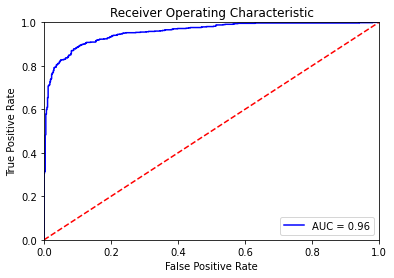

In [ ]:
# Compute predicted probabilities on the test set
probs = bert_predict(bert_classifier, val_dataloader)

# Evaluate the Bert classifier
evaluate_roc(probs, test_labels)